# Working with Excel

In this section, we will import large datasets from an excel spreadsheet using `pandas`.

## Dataframe 

Dataframes is an object treated as a database. 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel("D:/Downloads/vegetable.xlsx")
data.head()

,Order ID,Product,Category,Amount,Date,Country
0,1,Carrots,Vegetables,4270,2012-01-06,United States
1,2,Broccoli,Vegetables,8239,2012-01-07,United Kingdom
2,3,Banana,Fruit,617,2012-01-08,United States
3,4,Banana,Fruit,8384,2012-01-10,Canada
4,5,Beans,Vegetables,2626,2012-01-10,Germany


In [12]:
print(data)
type(data)

     Order ID   Product    Category  Amount       Date         Country
0           1   Carrots  Vegetables    4270 2012-01-06   United States
1           2  Broccoli  Vegetables    8239 2012-01-07  United Kingdom
2           3    Banana       Fruit     617 2012-01-08   United States
3           4    Banana       Fruit    8384 2012-01-10          Canada
4           5     Beans  Vegetables    2626 2012-01-10         Germany
..        ...       ...         ...     ...        ...             ...
208       209     Apple       Fruit    1777 2012-12-28          France
209       210     Beans  Vegetables     680 2012-12-28          France
210       211    Orange       Fruit     958 2012-12-29   United States
211       212   Carrots  Vegetables    2613 2012-12-29       Australia
212       213   Carrots  Vegetables     339 2012-12-30       Australia

[213 rows x 6 columns]


pandas.core.frame.DataFrame

Use `groupby` and `sum` to group categorial data and find the sum of amount of sold items.

In [13]:
vegetable_column = 'Category'
amount_sold = 'Amount'
data.groupby(vegetable_column)[amount_sold].sum()

Category
Fruit         693069
Vegetables    336665
Name: Amount, dtype: int64

- `head()` allows us to read the first few rows of the data set.
- `type()` returns the type of the object (dataframe)
- u can also print the full list of the data set with `print()`

In [14]:
data.describe()

,Order ID,Amount,Date
count,213.000000,213.000000,213
mean,107.000000,4834.431925,2012-06-26 17:00:50.704225280
min,1.000000,107.000000,2012-01-06 00:00:00
25%,54.000000,2417.000000,2012-04-01 00:00:00
50%,107.000000,4781.000000,2012-06-04 00:00:00
75%,160.000000,7223.000000,2012-09-19 00:00:00
max,213.000000,9990.000000,2012-12-30 00:00:00
std,61.631972,2765.396708,NaN


`describe()` returns descriptive statistics such as mean, standard deviation, min and max values, as well as the quartiles. U can also output additional statistical data as follow:

In [15]:
data.corr(numeric_only = True)

,Order ID,Amount
Order ID,1.000000,-0.001131
Amount,-0.001131,1.000000


In [16]:
investment = 1000
interest = 0.1
years = 10
future_value = (1 + interest)**years * investment
print("Your investment grew into %.2f" % future_value)
print("The time value of money %.2f" % (future_value - investment))

Your investment grew into 2593.74
The time value of money 1593.74


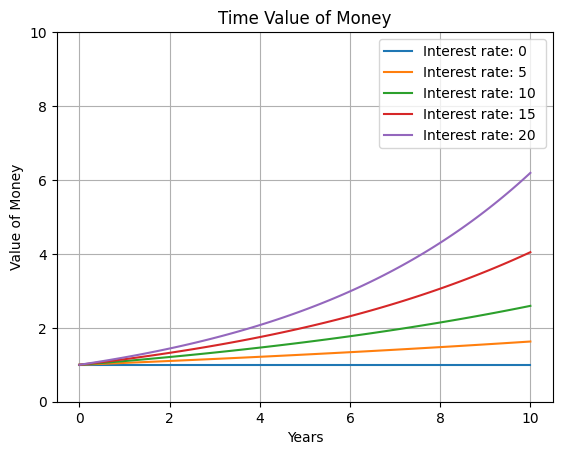

In [17]:
deposit = 1
# Vary the years beween 0 and 10
years = np.linspace(0, 10, 100)
for interest in [0, 5, 10, 15, 20]:
 investment= (1 + interest/100)**years * deposit
 ax = plt.gca()
 ax.plot(years, investment, label=('Interest rate: %d '% interest))
 ax.set_ylim(0, 10)
 ax.grid(True)
 plt.title('Time Value of Money')
 plt.xlabel("Years")
 plt.ylabel("Value of Money")
 ax.legend()
# If I put this in the for loop, then Python prints out a graph for each interest rate
plt.show()

In [18]:
investment = 100
interest = 0.05
years = 5
present_value = investment / (1 + interest)**years
print("Your future cash flow is worth %.2f today.\n" % present_value)
# Let's invest this present value and earn interest for five years.
future_value = present_value * (1 + interest)**years
print("Your money today will grow into %.2f." % future_value)


Your future cash flow is worth 78.35 today.

Your money today will grow into 100.00.


In [19]:
interest = 0.10
investments = { 1:100, 5: 200, 10: 300 }
for years, amount in investments.items():
 present_value = amount / (1 + interest)**years
 print("The present value is %.2f today for the FV of %.2f in %d years.\n" % (present_value, amount, years))


The present value is 90.91 today for the FV of 100.00 in 1 years.

The present value is 124.18 today for the FV of 200.00 in 5 years.

The present value is 115.66 today for the FV of 300.00 in 10 years.



In [25]:
import pandas as pd
import numpy_financial as npf
# You may have to install numpy_financial and restart kernel
cashflow = pd.Series(index=[0,1,2,3,4,5], name='Cashflow', data=[-107,5,5,5,5,105])
print(cashflow)
NPV = 100 * npf.irr(cashflow)
formatted_NPV = format(NPV, ".2f")
print(formatted_NPV)

0   -107
1      5
2      5
3      5
4      5
5    105
Name: Cashflow, dtype: int64
3.45
